# マハラノビス距離を用いたクラス識別


---
## 目的
マハラノビス距離を用いて，carとhumanのデータを学習する．その後，学習結果を確認するためにクラス識別実験を行う．


## プログラムの動作
以下のプログラムを実行すると，`data/cat.txt`と`data/human.txt`の2つを読み込む．次に，共分散行列を求め，マハラノビス距離を用いて認識率を計算する．

## 準備
プログラムの動作に必要なデータをダウンロードし，zipファイルを解凍する．

In [ ]:
!wget -q http://www.mprg.cs.chubu.ac.jp/tutorial/ML_Lecture/sklearn/data.zip
!unzip -q data.zip
!ls
!ls ./data

data  data.zip	__MACOSX  sample_data
car.txt  human.txt


## モジュールのインポート
初めに，必要なモジュールをインポートする．

今回は，マハラノビス距離と共分散行列を求めるために`EmpiricalCovariance`をインポートする．


In [ ]:
from os import path
import numpy as np
from sklearn.covariance import EmpiricalCovariance

## データの読み込み
次に，テキストファイルを読み込む．

In [ ]:
in_txt1 = open(path.join('data', 'car.txt'))
in_txt2 = open(path.join('data', 'human.txt'))

car = np.asarray([(line.strip()).split('\t') for line in in_txt1], dtype=float)
print(car.shape)
human = np.asarray([(line.strip()).split('\t') for line in in_txt2], dtype=float)
print(human.shape)

(110, 2)
(382, 2)


## 共分散行列の計算
マハラノビス距離を求めるためには，母集団の共分散行列を求める必要がある．scikit-learnを用いれば，共分散行列は1つの関数で簡単に求めることができる．

carとhumanそれぞれの共分散行列を求めて，変数car_covとhuman_covに代入している．

In [ ]:
car_cov = EmpiricalCovariance().fit(car)
human_cov = EmpiricalCovariance().fit(human)

 ## マハラノビス距離で識別
 先程求めた共分散行列を用いて，データ1つ1つに対してマハラノビス距離を求める．
carの共分散行列に対してcarの距離を求めると距離が近くなり，humanの共分散行列に対してcarの距離を求めると距離が遠くなる．

言い換えれば，あるデータがcarかhumanかわからないとき，共分散行列を用いて距離が近い方に所属させることでクラスタリングを行うことができる．

In [ ]:
#calc distance each class for car data
car_mahal = car_cov.mahalanobis(car)
human_mahal = human_cov.mahalanobis(car)

car_correct = 0
for c_dist, h_dist in zip(car_mahal, human_mahal):
    if c_dist < h_dist:
        car_correct +=1
print('car recognition rate : ' , car_correct / float(car.shape[0]) , '(' , car_correct ,'/', car.shape[0] , ')')

car recognition rate :  0.9 ( 99 / 110 )


初めの3行では，carとhumanの2つの共分散行列に対して，どちらもcarのデータでマハラノビス距離を求める．

識別率を計算するためにcar_correct変数を初期化(ゼロを代入)して，for文で各データに対して識別テストを行っている．先程求めたマハラノビス距離を1つずつ比較して，carの方が小さければ識別成功とする．なぜならば，c_distはcarの共分散行列を用いてcarの距離を計算している値であり，h_distはhumanの共分散行列を用いてcarの距離を計算している値である．正しく識別できているならばc_distの方が小さくなるからである

最後に，識別できた数をデータの母数で割って識別率を計算する．

humanについても同様に識別率を計算する．

In [ ]:
#calc distance each class for human data
car_mahal = car_cov.mahalanobis(human)
human_mahal = human_cov.mahalanobis(human)

human_correct = 0
for c_dist, h_dist in zip(car_mahal, human_mahal):
    if h_dist < c_dist:
        human_correct +=1
print('human recognition rate : ' , human_correct / float(human.shape[0]), '(' , human_correct ,'/', human.shape[0] , ')')

human recognition rate :  0.93717277486911 ( 358 / 382 )


## 平均識別率の計算
最後に，2つの識別率をあわせて平均の識別率を求める．

In [ ]:
print('average recognition rate : ' , ( car_correct / float(car.shape[0]) + human_correct / float(human.shape[0]) ) / 2.0)

average recognition rate :  0.918586387434555


## グラフの描画
matplotlibを用いて，マハラノビス距離の関数を等高線のように表示する．carのデータを青色で，humanのデータを赤色でプロットし，それぞれのマハラノビス距離を等高線グラフとして表示する．また，これまでと同じように識別境界のわかるグラフも作成する．グラフ作成方法の詳しい説明は割愛する．

/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


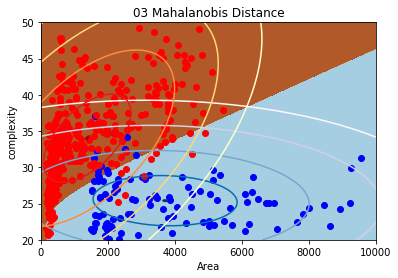

In [ ]:
#data plot
import matplotlib.pyplot as plt

fig = plt.figure()
subfig = fig.add_subplot(1, 1, 1)
plt.xlim(0, 10000)
plt.ylim(20, 50)

#Show contours of the distance functions
xx, yy = np.meshgrid(np.linspace(plt.xlim()[0], plt.xlim()[1], 500),
                     np.linspace(plt.ylim()[0], plt.ylim()[1], 500))
zz = np.c_[xx.ravel(), yy.ravel()]

car_mahal_emp_cov = car_cov.mahalanobis(zz)
car_mahal_emp_cov_reshape = car_mahal_emp_cov.reshape(xx.shape)

human_mahal_emp_cov = human_cov.mahalanobis(zz)
human_mahal_emp_cov_reshape = human_mahal_emp_cov.reshape(xx.shape)

Z = []
for c_dist, h_dist in zip(car_mahal_emp_cov, human_mahal_emp_cov):
    if c_dist < h_dist:
        Z.append(0)
    else:
        Z.append(1)
Z = np.asarray(Z)
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

levels = [0.03, 1, 2, 3, 4]
car_emp_cov_contour = subfig.contour(xx, yy, np.sqrt(car_mahal_emp_cov_reshape), levels,
                                     cmap=plt.cm.PuBu_r,
                                     linestyles='solid')
human_emp_cov_contour = subfig.contour(xx, yy, np.sqrt(human_mahal_emp_cov_reshape), levels,
                                       cmap=plt.cm.YlOrRd_r,
                                       linestyles='solid')


car_plot = subfig.scatter(car[:, 0], car[:, 1], color='blue', label='car')
human_plot = subfig.scatter(human[:, 0], human[:, 1], color='red', label='human')

subfig.set_title('03 Mahalanobis Distance')
subfig.set_xlabel('Area')
subfig.set_ylabel('complexity')

plt.savefig("03_graph.png")
plt.show()

## 課題
1. ユークリッド距離とマハラノビス距離の結果を比較し，結果が異なる理由をまとめよ．
2. 値[2000.0, 40.0]はcar/humanどちらに属するか．マハラノビス距離を用いて識別せよ．

## ヒント
1. ユークリッド距離とマハラノビス距離がそれぞれどんなものかを確認しよう．
2. 2つの共分散行列を用いて確認する．データはnp.array([[2000.0, 40.0]])として与える．